<a href="https://colab.research.google.com/github/bibell0211/phantichdulieu/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [ ]:
def load_image(filename):
  # load tấm ảnh lên
  img = load_img(filename, grayscale=True, target_size=(32, 32))
  # chuyển về dạng vector
  img=img_to_array(img)
	# reshape into a single sample with 1 channel
  img=img.reshape(1,1024)
  img=img.astype('float32')
  #chuẩn hóa dữ liệu về 0-1
  img=img/255.0
  return img

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() 
X_train.shape #(50.000 mẫu , kích thước ảnh 32x32 ,mảng 3 chiều)

(50000, 32, 32, 3)

In [ ]:
X_test.shape # Ảnh Test

(10000, 32, 32, 3)

In [ ]:
y_train.shape # Ảnh Train

(50000, 1)

In [ ]:
y_train[:5] # Mảng 2 chiều

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

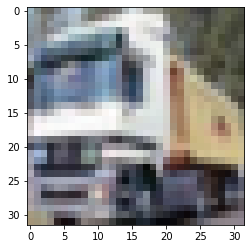

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train = y_train.reshape(-1,) # Chuyển  thành mảng 1 chiều
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index): # Dán nhãn cho data
    plt.figure(figsize = (15,2)) # kích thước
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

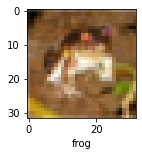

In [ ]:
plot_sample(X_train, y_train, 0)

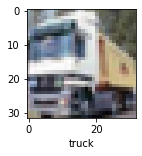

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Mạng ANN Nơ ron nhân tạo để phân loại hình nhả
# ann = models.Sequential([
#        layers.Flatten(input_shape=(32,32,3)), # bề mặt kích thước ảnh , 3 chiều
#        layers.Dense(3000, activation='relu'), # 
#        layers.Dense(1000, activation='relu'),
#       layers.Dense(10, activation='softmax') # 10 class    
#   ])

# ann.compile(optimizer='SGD',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#
# ann.fit(X_train, y_train, epochs=5)

In [ ]:
# Convolutional Neural Network (CNN)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # Truyền vào kích thước ảnh , mảng 3 chiều
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes)) # Báo cáo phân loại

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.87      0.78      0.82      1000
           2       0.51      0.70      0.59      1000
           3       0.52      0.54      0.53      1000
           4       0.68      0.56      0.62      1000
           5       0.67      0.53      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9058 - accuracy: 0.6970


[0.9057523608207703, 0.6970000267028809]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.19795336e-03, 1.10259796e-04, 2.10104440e-03, 6.85838103e-01,
        1.44007220e-03, 2.24650316e-02, 7.99657137e-04, 2.94842961e-04,
        2.81614274e-01, 4.13882174e-03],
       [1.38356874e-04, 4.88278631e-04, 2.30203227e-07, 2.09744186e-07,
        1.32000338e-07, 5.71246772e-10, 5.30216704e-10, 1.21668720e-08,
        9.99362528e-01, 1.02410559e-05],
       [3.52242030e-02, 6.73974073e-03, 6.26145513e-04, 3.39760765e-04,
        6.50633650e-04, 5.44487302e-05, 2.30893038e-05, 1.05069345e-03,
        9.45740104e-01, 9.55114421e-03],
       [9.77974772e-01, 3.69058282e-04, 1.64997056e-02, 2.55088053e-05,
        6.17448299e-04, 3.65602745e-07, 3.91009889e-05, 2.89672016e-06,
        4.47095977e-03, 2.09042938e-07],
       [9.77491509e-05, 2.09454913e-04, 1.80102348e-01, 2.03863420e-02,
        2.39289239e-01, 1.21020549e-03, 5.57389915e-01, 1.90536430e-05,
        1.29485037e-03, 7.98747749e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'airplane'

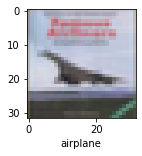

In [ ]:
plot_sample(X_test, y_test,3)
classes[y_classes[3]]

In [ ]:
img_test = load_image('automobile4.png')
result_img = cnn.predict(img_test)
print(result_img[0].argmax())

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


ValueError: ignored